In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


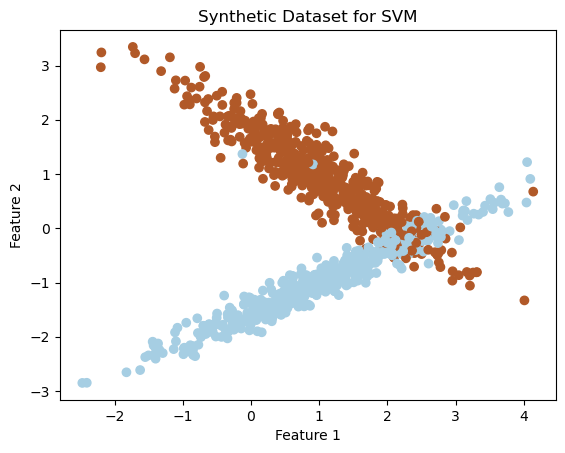

In [2]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')
plt.title("Synthetic Dataset for SVM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Create and train the SVM model
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [5]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)


In [6]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.925
Confusion Matrix:
 [[103   1]
 [ 14  82]]


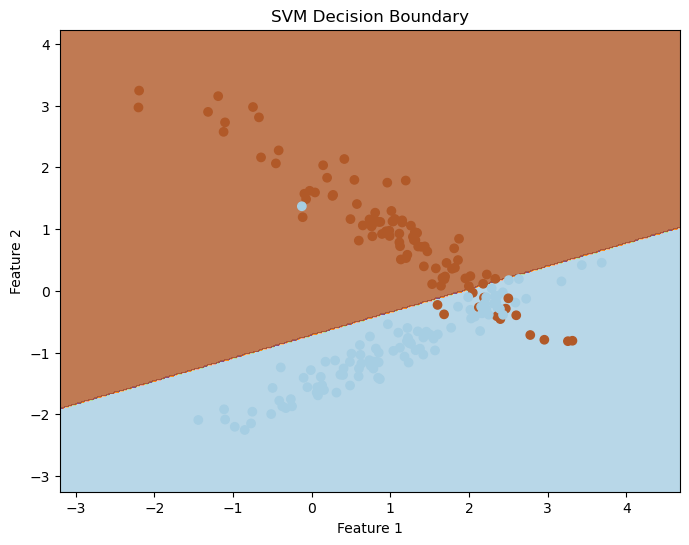

In [7]:
# Visualize the decision boundary
def plot_decision_boundary(model, X, y):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')

# Plot decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(svm_model, X_test, y_test)
plt.title("SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


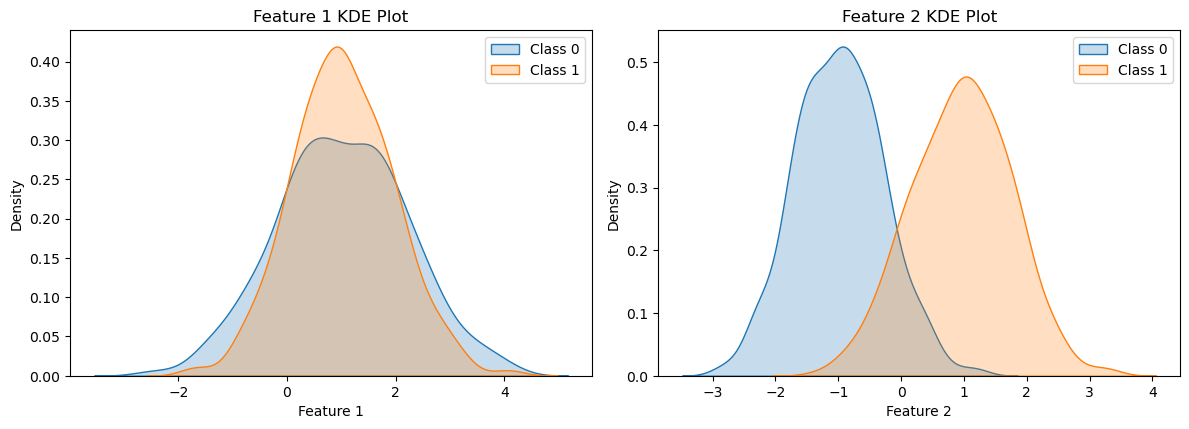

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress use_inf_as_na FutureWarning in seaborn
with warnings.catch_warnings():
    warnings.simplefilter('ignore', FutureWarning)
    
    # Assuming you have X_train and y_train defined
    
    # Visualize Kernel Density Estimation (KDE) plots for each feature
    plt.figure(figsize=(12, 8))
    for i in range(X.shape[1]):
        plt.subplot(2, 2, i + 1)
        sns.kdeplot(X_train[y_train == 0][:, i], label='Class 0', fill=True)
        sns.kdeplot(X_train[y_train == 1][:, i], label='Class 1', fill=True)
        plt.title(f"Feature {i+1} KDE Plot")
        plt.xlabel(f"Feature {i+1}")
        plt.ylabel("Density")
        plt.legend()

    plt.tight_layout()
    plt.show()


Using 800 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

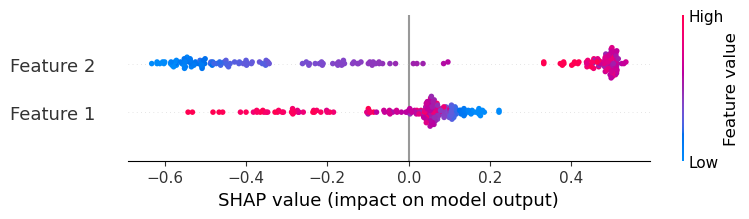

In [11]:
# Visualize SHAP summary plot
import shap

# Create a KernelExplainer
explainer = shap.KernelExplainer(svm_model.predict, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])


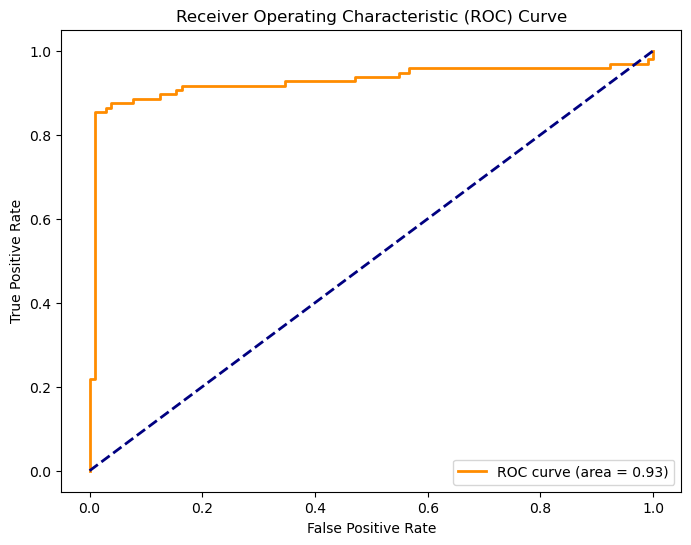

In [26]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, svm_model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


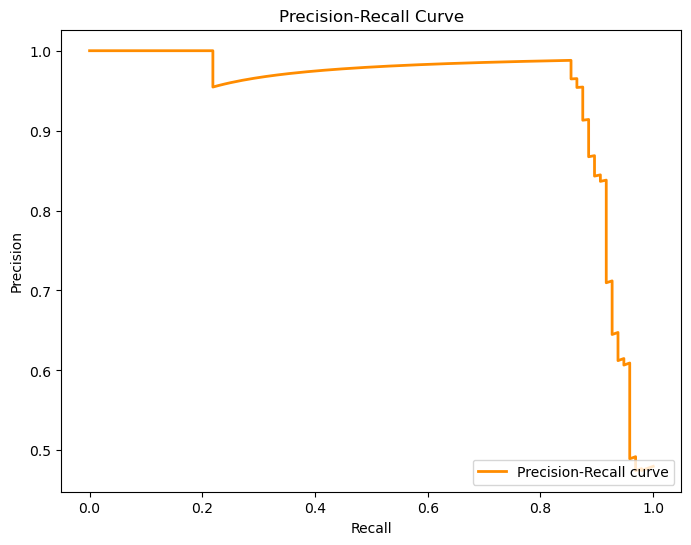

In [28]:
# Visualize Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, svm_model.decision_function(X_test))

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()
